Just some simple animation. The second animation is Recursive, but the same method can be used for iterative approaches.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(num):
    l.set_data(t[:num], x[:num])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
plt.close()

ani

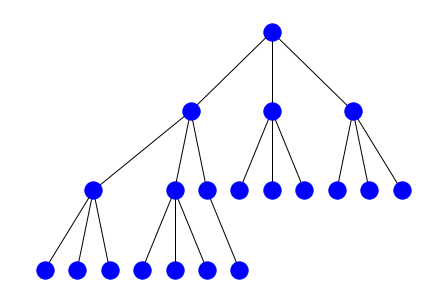

In [2]:
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx

G = nx.full_rary_tree(3, 20) 
pos = graphviz_layout(G, prog="dot")

nx.draw(G, pos=pos, node_color="b")

In [4]:
class Animation:
    def __init__(self, Graph, pos):
        self.fig = plt.gcf()
        self.ax = plt.gca()
        plt.close()
        self.G = Graph
        self.pos = pos

        self.node_color=[G.nodes[n].get("color", "b") for n in G.nodes]
        self.x = self.update()

    @property
    def anim(self):
        if not hasattr(self, "_anim"):
            self._anim = matplotlib.animation.FuncAnimation(self.fig, self, frames=len(self.G.nodes) + 1, interval=250)
        return self._anim

    def update(self, node = 0, origin = None):
        yield
        self.node_color[node] = "r"
        for i in self.G.neighbors(node):
            if i != origin:
                for _ in self.update(i, node):
                    yield

    def __call__(self, num):
        try:
            nx.draw(self.G, node_color=self.node_color, pos=self.pos, ax=self.ax, edge_color=["r" if self.node_color[e[0]] == "r" 
                and self.node_color[e[1]] == "r" else "black" for e in self.G.edges])
            next(self.x)
        except StopIteration:
            pass

        

a = Animation(G, pos)
a.anim